## Covid-19 Drug Discovery
**Objectif : Prédire l'activité antivirale (pIC50) de molécules candidates contre le SARS-CoV-2 à partir de descripteurs moléculaires.**

### Import des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import des data

In [2]:
data=pd.read_csv("/Users/mafaldafrere/Documents/Cours/IODAA/PROG/PROJET/covid19_drug_discovery/drug_data_with_properties.xls")
data.head()

,CID,SMILES,MolecularFormula,MolecularWeight,InChI,InChIKey,IUPACName,XLogP,ExactMass,MonoisotopicMass,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,C21H14Cl2N4OS2,473.4,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,LILOEJREEQFTPM-UHFFFAOYSA-N,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",5.6,471.998609,471.998609,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2821293,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,C21H15ClF3N5OS2,510.0,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",AWQBIBTZJKFLEW-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,4.9,509.035865,509.035865,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,2820912,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,WRXXISITJDZVCL-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
3,2820914,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,NNVVKOVHRSDRSQ-UHFFFAOYSA-N,N-(2-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.2,8.0,10.0,BLINDED
4,2744846,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,C19H14ClN5OS3,460.0,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,JEZYTEDGOJCVQS-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...",4.4,459.004901,459.004901,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036


Premières observations : 
- On a des descripteurs sous forme de chaîne de caractère : par exemple pour la représentation SMILES de la molécule. Pour le moment je ne sais pas trop comment les gérer, on va probablement commencer par tester un modèle seulement avec des descripteurs numériques. 
- Valeurs BLINDED dans Target ? 

### 1. Exploration Préliminaire

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CID                       104 non-null    int64  
 1   SMILES                    104 non-null    object 
 2   MolecularFormula          104 non-null    object 
 3   MolecularWeight           104 non-null    float64
 4   InChI                     104 non-null    object 
 5   InChIKey                  101 non-null    object 
 6   IUPACName                 101 non-null    object 
 7   XLogP                     101 non-null    float64
 8   ExactMass                 101 non-null    float64
 9   MonoisotopicMass          101 non-null    float64
 10  TPSA                      101 non-null    float64
 11  Complexity                101 non-null    float64
 12  Charge                    101 non-null    float64
 13  HBondDonorCount           101 non-null    float64
 14  HBondAccep

Analyse NA :

In [4]:
# pourcentage de valeurs manquantes par colonne
na_counts = data.isna().sum()
na_percent = (na_counts / len(data)) * 100

# dataframe pr résumé
na_summary = pd.DataFrame({
    'Missing Count': na_counts,
    'Missing (%)': na_percent
})

# afficher que les colonnes avec au moins 1 NA
na_summary = na_summary[na_summary['Missing Count'] > 0].sort_values(by='Missing (%)', ascending=False)

# Affichage
display(na_summary)

,Missing Count,Missing (%)
FeatureAnionCount3D,4,3.846154
FeatureDonorCount3D,4,3.846154
YStericQuadrupole3D,4,3.846154
ZStericQuadrupole3D,4,3.846154
FeatureCationCount3D,4,3.846154
ConformerCount3D,4,3.846154
FeatureRingCount3D,4,3.846154
EffectiveRotorCount3D,4,3.846154
ConformerModelRMSD3D,4,3.846154
FeatureHydrophobeCount3D,4,3.846154


In [24]:
data.pIC50[data.pIC50=="BLINDED"].count()

np.int64(10)

On a 10 valeurs "BLINDED" dans la colonne target (pIC50): impossible de savoir de quoi il s'agit dans la documentation Kaggle, donc on va retirer ces lignes.

In [34]:
data=data[data["pIC50"]!="BLINDED"]
data.shape

data.pIC50=pd.to_numeric(data.pIC50)

On va drop les colonnes non-numériques :

In [ ]:
cat_cols=data.select_dtypes(include='object').columns
data=data.drop(columns=cat_cols)

data.info()

Après avoir rapidement regardé le dataset, on dirait qu'il y a des colonnes dont la valeur ne varie jamais, pour tous les individus :

In [61]:
for col in data.columns:
    if data[col].nunique() == 1:
        print(col, "est constante")

Charge est constante
IsotopeAtomCount est constante
DefinedAtomStereoCount est constante
UndefinedBondStereoCount est constante
CovalentUnitCount est constante


Effectivement, c'est le cas pour 5 colonnes! On les retire car elles n'apportent aucune information. => On évite la redondance et le bruit dans le modèle

In [62]:
data=data.drop(columns=["Charge","IsotopeAtomCount","DefinedAtomStereoCount","UndefinedBondStereoCount","CovalentUnitCount"])

### 2. Data Exploration

<Axes: xlabel='pIC50', ylabel='Count'>

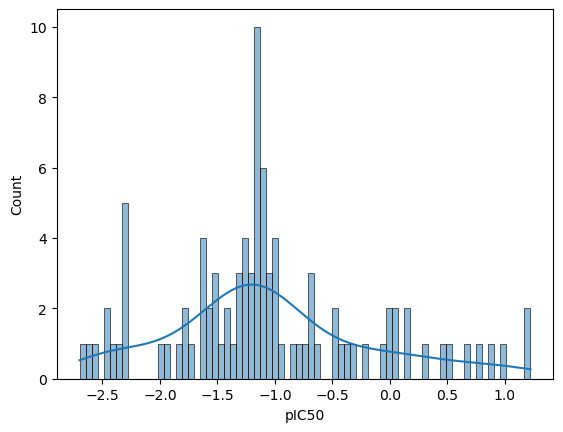

In [42]:
import seaborn as sns
sns.histplot(data.pIC50, bins=75, kde=True)

La distribution de la target est relativement normale. On n'observe pas de gros déséquilibres particuliers.

<Figure size 1000x800 with 0 Axes>

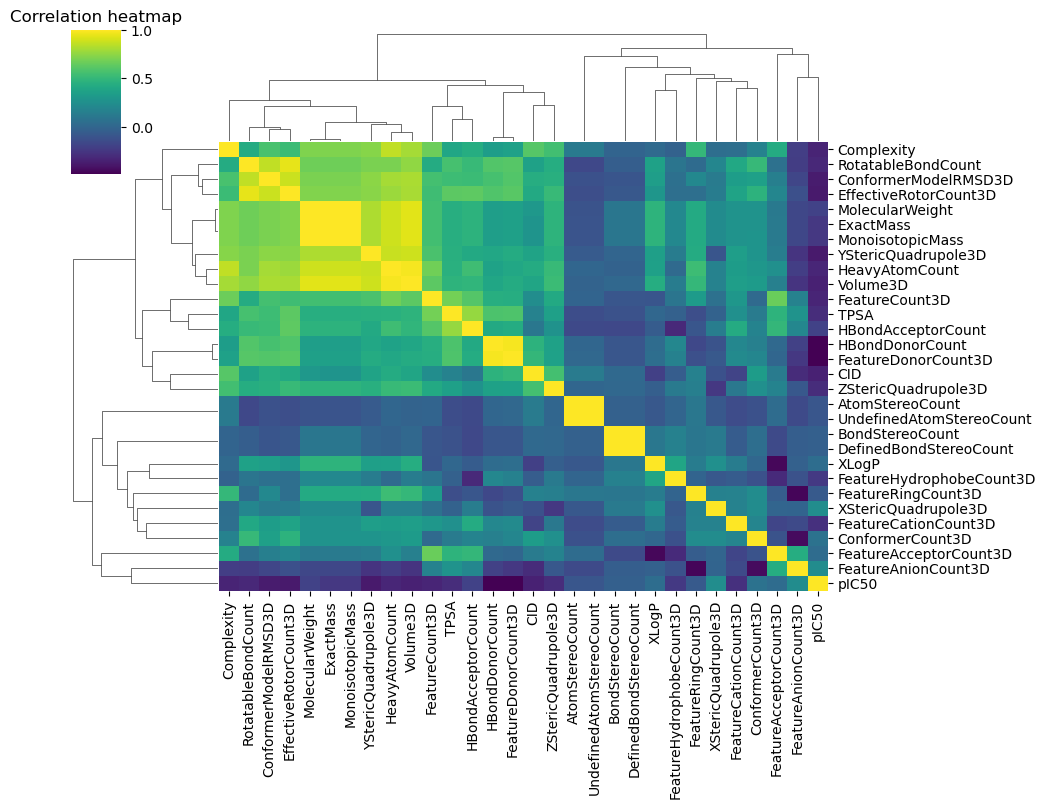

In [ ]:
corr = data.corr()

plt.figure(figsize=(10,8))
#sns.heatmap(corr, cmap="viridis", annot=False) # sans cluster 
sns.clustermap(corr_filtered, cmap="viridis", figsize=(10,8)) # avec clusterisation
plt.title("Correlation heatmap")
plt.show()


On repère déjà que des variables sont anti-corrélées ou corrélées à la target, ce qui est déjà bon signe pour la suite (par exemple HBondDonorCount et FeatureDonorCount3D semblent importantes pour prédire l'outcome).

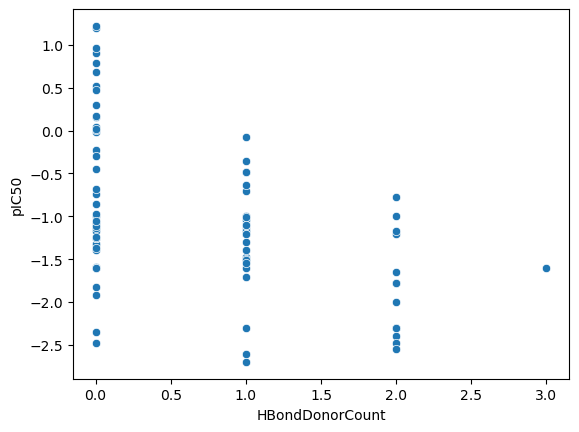

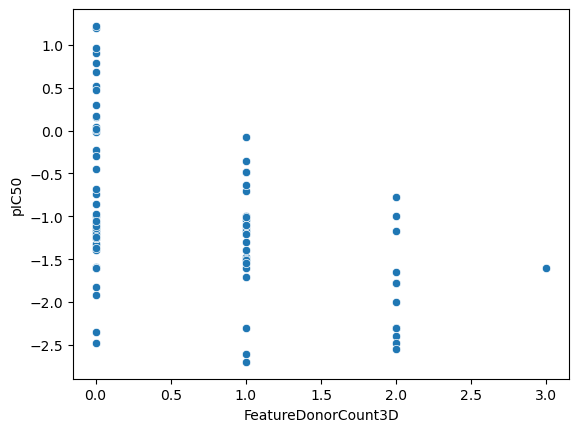

In [71]:
sns.scatterplot(data=data, x="HBondDonorCount", y="pIC50")
plt.show()

sns.scatterplot(data=data, x="FeatureDonorCount3D", y="pIC50")
plt.show()

Bon, il faut qu'on se penche + sur les distributions et les valeurs de chaque colonnes, car ici la corrélation est probablement faussée par le fait qu'il n'y a que 4 valeurs possibles pour pIC50 (même si il existe probablement quand même un lien faible pIC50 <=> High featuredonorcount3D par exemple)

**Focus distributions/valeurs par colonnes :**

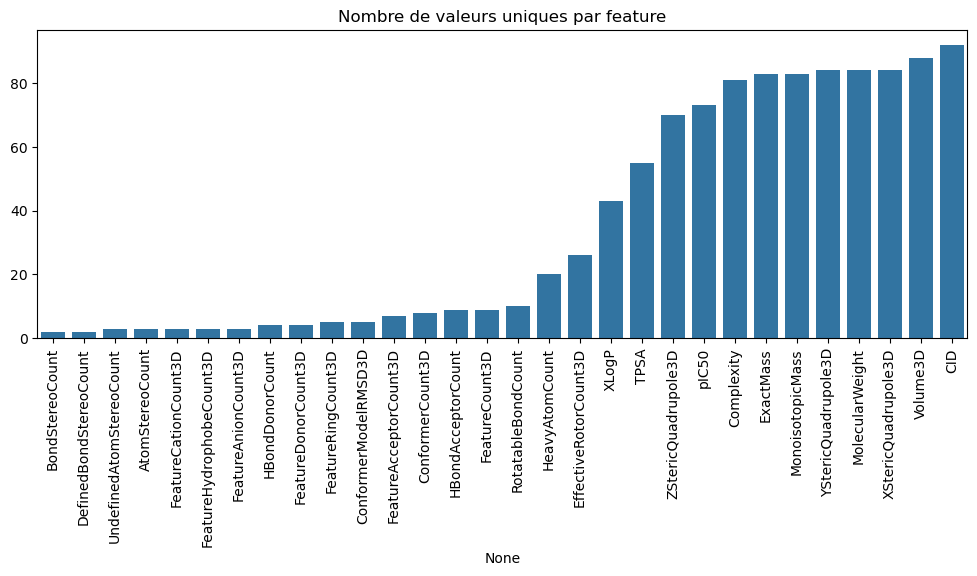

In [72]:
uniques = data.nunique().sort_values()
uniques

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
sns.barplot(x=uniques.index, y=uniques.values)
plt.xticks(rotation=90)
plt.title("Nombre de valeurs uniques par feature")
plt.show()


On a les variables BondStereoCount et DefinedBondStereoCount qui n'ont que deux valeurs uniques ! 

<Axes: xlabel='BondStereoCount', ylabel='pIC50'>

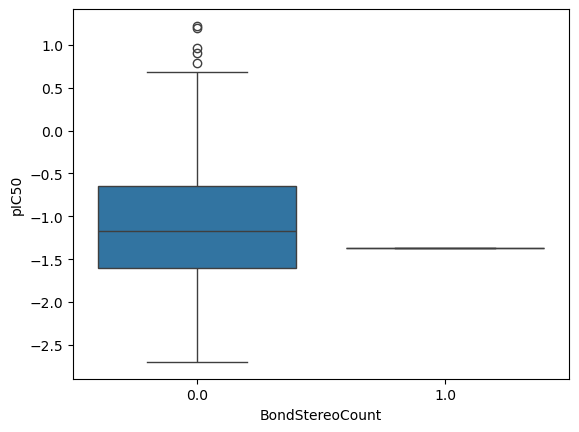

In [ ]:
sns.boxplot(data=data, x="BondStereoCount", y="pIC50")

<Axes: xlabel='DefinedBondStereoCount', ylabel='pIC50'>

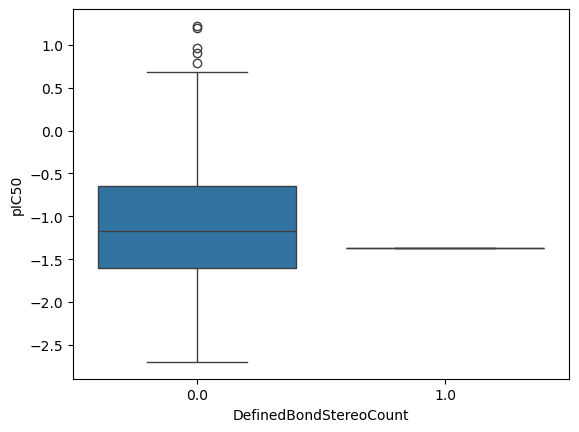

In [83]:
sns.boxplot(data=data, x="DefinedBondStereoCount", y="pIC50")

Ces deux colonnes sont quasiment constantes ! On les élimine car n'apportent pas d'information est risquent de rajouter du bruit au modèle. 

In [85]:
data=data.drop(columns=["DefinedBondStereoCount","BondStereoCount"])

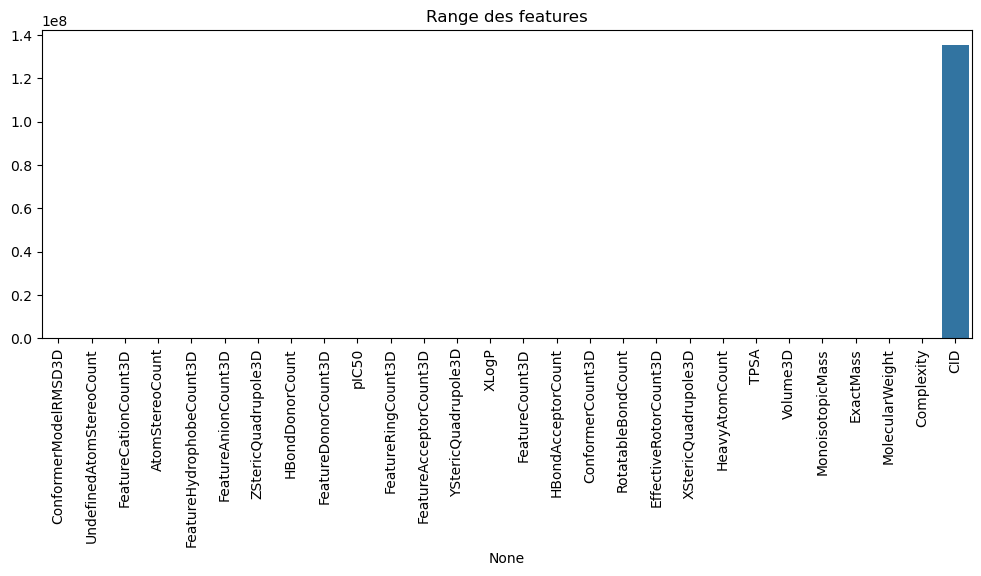

In [86]:
# echelle /range
ranges = (data.max() - data.min()).sort_values()
ranges

plt.figure(figsize=(12,4))
sns.barplot(x=ranges.index, y=ranges.values)
plt.xticks(rotation=90)
plt.title("Range des features")
plt.show()


CID a une énorme amplitude => à scaler absolument!!!

In [87]:
def classify_feature(col):
    n = data[col].nunique()
    if n == 1:
        return "constant"
    elif n <= 5:
        return "discrete <=5 levels"
    elif n <= 15:
        return "moderately discrete"
    else:
        return "continuous"

categories = {col: classify_feature(col) for col in data.columns}
pd.Series(categories).value_counts()


continuous             14
discrete <=5 levels     9
moderately discrete     5
Name: count, dtype: int64

On utilise maintenant des techniques de visualisation (ici seulement visualisation, on ne les utilise pas pour l'entraînement), linéaires (PCA) et non linéaire (umap) pour observer des structures dans l'espace chimique de nos datas.

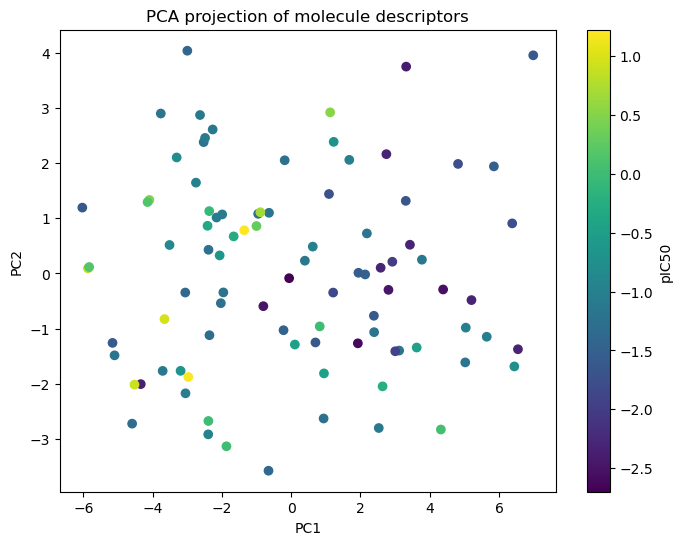

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# drop target
data_PCA = data.drop(columns=["pIC50"]).dropna() # je me permets de drop car peu de NA 

# Standardisation
scaled = StandardScaler().fit_transform(data_PCA)

# PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(scaled)

plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], c=data.loc[data_PCA.index,"pIC50"], cmap="viridis")
plt.colorbar(label="pIC50")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection of molecule descriptors")
plt.show()


/Users/mafaldafrere/miniforge3/envs/env_numpy/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


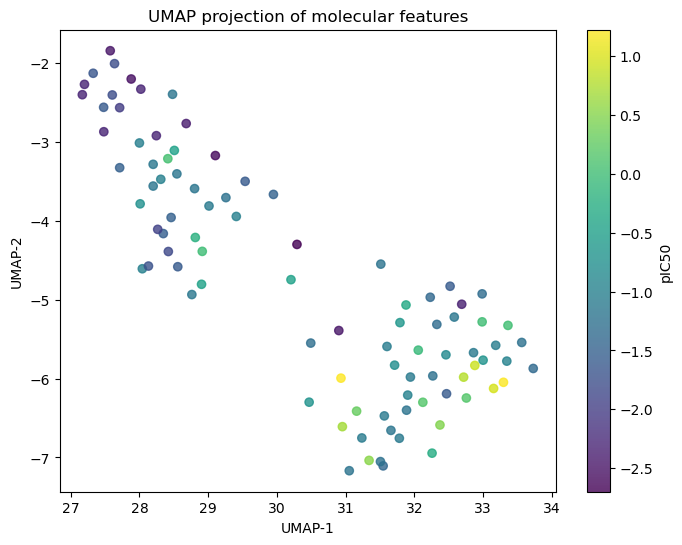

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Copy to avoid messing with original
df = data.copy()

df = df.dropna() # peu de NA donc on drop


# Target
y = df["pIC50"]
X = df.drop(columns=["pIC50"])

# Standardize
X = StandardScaler(with_mean=True).fit_transform(X)

# ---- UMAP ----
umap_model = umap.UMAP(
    n_neighbors=15,      # local structure
    min_dist=0.1,        # cluster tightness
    n_components=2,      # 2D
    metric='euclidean',  # can try 'cosine' if fingerprints later
    random_state=42
)

embedding = umap_model.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(embedding[:,0], embedding[:,1], c=y, cmap="viridis", alpha=0.8)
plt.colorbar(scatter, label="pIC50")
plt.title("UMAP projection of molecular features")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()


La PCA est assez disséminée et complexe à analyser. La umap semble un peu plus structurée, avec deux amas de points : l'un dont le pIC50 est plus élevé (meilleur médicament potentiel), et l'autre où le pIC50 est plus faible. C'est assez prometteur pour la suite !
La umap étant plus structurée, on peut s'attendre à ce que des modèles non-linéaires performent mieux (RF, boosting).

### 3. Split Train / Test

On isole une partie du jeu de données qui ne sera jamais vu lors de l'entraînement / tuning des hyper-paramètres pour tester nos performances à la fin.

In [7]:
from sklearn.model_selection import train_test_split

X=data.drop(columns=["pIC50"])
y=data.pIC50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 4. Comparaison de modèles